# Implementation of Softmax Regression Model with Keras
Instructions:
- Start the kernel: In the menu bar, select Kernel -> Restart kernel.
- Complete all sections with the comment `YOUR CODE HERE`.
- Run all code blocks to check the implementation: In the menu bar, select Cell -> Run All.

A machine learning model typically needs to have at least the following 7 methods:

- `__init__`: The constructor method in object-oriented programming is used to initialize default parameters or set up the initial state of a model. In the initial exercises, this constructor may not be used for simplicity.
- `build`: Builds the architecture of the model.
- `train`: Starts the training process of the model.
- `save`: Saves the trained model.
- `load`: Loads a pre-trained model from a file.
- `summary`: Prints a summary of the model's architecture.
- `predict`: Makes predictions on input data and outputs the corresponding output values.

These methods play key roles in the lifecycle of a machine learning model, including its initialization, training, saving, loading, summarizing, and making predictions.

In [1]:
# The general implementation of the model includes 7 basic methods.
# Note: This model is just a suggestion and not mandatory.
# However, in the exercise section, it is required to adhere to these method names.
import numpy as np
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## Step 1. Import Keras Libraries

First, let's import the necessary libraries, modules, and functions from Keras:
- `Input`: Used to receive input data for the model.
- `Dense`: Also known as the Fully Connected layer, an essential component of Neural Network-based models.
- `Model`: This is the model object class used to package the input and output layers, train with the `fit` method, and make predictions with `predict`.
- `load_model`: A function used to load a model from a file.

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model

## Step 2. Implementing Softmax Regression Model

Next, based on the `MyModel` object framework presented in the previous section, we will proceed to implement the **Softmax Regression** model. The main method to be implemented in this exercise is `def build()`. The remaining methods have been pre-implemented, and you should read and understand their purpose and usage for future reference.

<p align="center">
  <img src="SoftmaxReg.png" />
</p>

In [3]:
# Softmax Regression
class SoftmaxRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim, output_dim):
        # `input_dim`: The size of the input feature.
        # `output_dim`: The number of classes to be classified.

        # Khởi tạo model
        self.model = None

        # Implement the `build()` method to define the ARCHITECTURE of the model and save it in the `self.model` attribute.
        # Use the following object variables:
        #  - Create a variable `input` with the `Input` object class from Keras, passing the input dimension `input_dim`.
        #  - Create a variable `output` with the `Dense` object class from Keras,
        # passing the following parameters: the output dimension (pay attention to MULTI-CLASS CLASSIFICATION), including the use of bias, and using the `softmax` activation function.
        # After this step, `self.model` will package the `input` and `output` variables to form the model.
        ### YOUR CODE HERE

        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.01) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy') # CCE loss
        return self.model.fit(x_train, y_train, epochs=100)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Next, we will initialize the SoftmaxRegression object and test whether the `build` method has been implemented correctly.

In [4]:
sr = SoftmaxRegression()
# In this example, we will initialize the input as a 1000-dimensional vector,
# and the task requires classifying 20 object classes.
sr.build(1000, 20)

In [5]:
# Check the architecture containing Input and Output classes.
assert len(sr.model.layers)==2
assert str(type(sr.model.layers[0]))== "<class 'keras.engine.input_layer.InputLayer'>"
assert str(type(sr.model.layers[1]))== "<class 'keras.layers.core.dense.Dense'>"
assert sr.model.layers[0].input_shape[0][1] == 1000
assert sr.model.layers[1].output_shape[1] == 20
assert sr.model.layers[1].use_bias == True

In [6]:
# Test with hidden test cases.


## Step 3. Generate Sample Data (Toy Example)

Next, we will generate sample data for training and testing.

The data will be generated as random points around 4 clusters:
- [10, -2]
- [2, 8]
- [12, 8]
- [-2, 0]

Note that these 4 clusters are well-separated from each other so that even with added random noise, the points belonging to these 4 clusters will not intersect with each other.

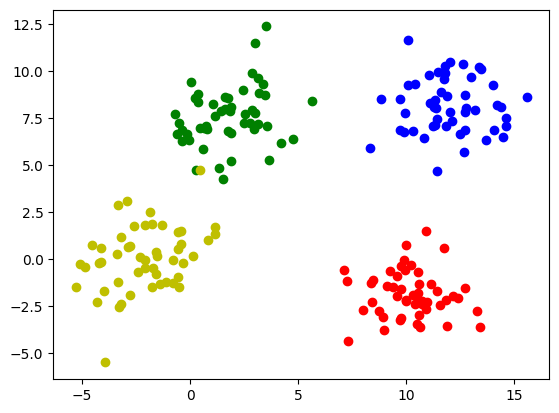

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of classes: 4
K = 4
# Create a dataset including 4 points
# S1, S2, S3, S4 are the centers of the 4 classes.
S1= np.array([[10,-2]])
S2= np.array([[2,8]])
S3= np.array([[12,8]])
S4= np.array([[-2,0]])

# 50 samples for each class
n_sample = 50
# Generate points with random noise around 4 centers.
pts1 = S1 + np.random.normal(0, 1.5, size=(n_sample,2))
pts2 = S2 + np.random.normal(0, 1.5, size=(n_sample,2))
pts3 = S3 + np.random.normal(0, 1.5, size=(n_sample,2))
pts4 = S4 + np.random.normal(0, 1.5, size=(n_sample,2))

# Concatenate all samples into a single data block X (input features) and Y (labels).
X_train = np.concatenate((pts1, pts2, pts3, pts4))
# Concatenate data labels to a single input variable Y
Y_train = np.concatenate(([0]*n_sample, [1]*n_sample, [2]*n_sample, [3]*n_sample))

# Convert Y from label format to one-hot vectors.
Y_train = Y_train.astype(int)
Y_oh = np.zeros((Y_train.size, Y_train.max()+1 ))
Y_oh[np.arange(Y_train.size), Y_train] = 1

# Visualize the data using colored circles: red, green, blue, and yellow.
plt.plot(pts1[:,0], pts1[:,1], 'ro')
plt.plot(pts2[:,0], pts2[:,1], 'go')
plt.plot(pts3[:,0], pts3[:,1], 'bo')
plt.plot(pts4[:,0], pts4[:,1], 'yo')
plt.show()


## Step 4. Train the model with the sample data

Next, we will reinitialize the model to fit the generated sample data from the previous step. The architecture of the model must be compatible with the dimensions of the sample data.

In [8]:
sr = SoftmaxRegression()

# Call the `build` method for the `sr` object and pass the corresponding input parameters
# based on the generated training data in the code block above.
# According to you, what are the values of `input_dim` and `output_dim`?

### YOUR CODE HERE

# To display the architecture of the model, you can call the `summary` method.
print("The architecture of the Softmax Regression model: ")
sr.summary()

The architecture of the Softmax Regression model: 
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Check the invocation of the `build` method.


In [10]:
# To train the model, we call the `train` method with the generated sample data.
# If the `build` step of the model is called correctly, the subsequent `train` step will be executed successfully.
# NOTE: Here, we use the output `Y_oh` in the one-hot format instead of the label format.
hist = sr.train(X_train, Y_oh)

Epoch 1/100
7/7 [==============================] - 1s 13ms/step - loss: 6.9243
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 3.8826
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 2.0957
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.0813
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6660
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5401
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4820
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4436
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4189
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3988
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3823
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3664
Epoch 13/100
7/7 [==============================] - 0s 3ms/s

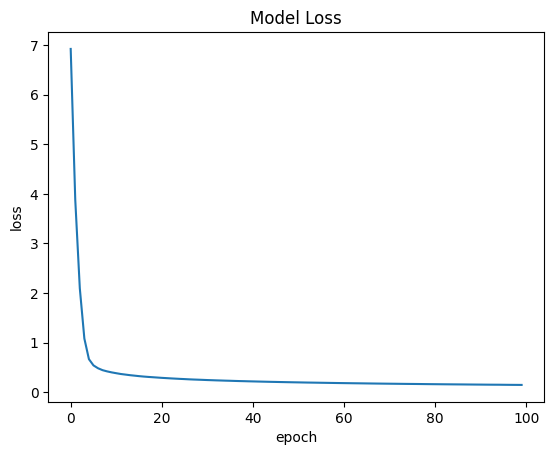

In [11]:
# Display the loss per epoch.
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# After training, we save the model for future reuse.
# Note: The two methods `save`
# and `load` are used when you want to reuse the model multiple times WITHOUT THE NEED TO RETRAIN it.
sr.save('softmax_regression_model.h5')

## Step 5. Visualizing the Model and Making Predictions with Test Data

In [13]:
# Create a new object and call the method to load the model from a file.
pretrain_sr = SoftmaxRegression()
pretrain_sr.load('softmax_regression_model.h5')

In [16]:
# Display the parameters of the Softmax model.
theta = pretrain_sr.get_weights()
print('The optimal parameters: ')
print(theta)

The optimal parameters: 
[array([[ 0.6887503 , -0.2827187 ,  0.48174617, -0.99662185],
       [-0.9133098 ,  0.58284265, -0.01851288,  0.04117542]],
      dtype=float32), array([-0.05868382, -0.25168774, -0.25646934,  0.56684077], dtype=float32)]


20/20 [==============================] - 0s 3ms/step


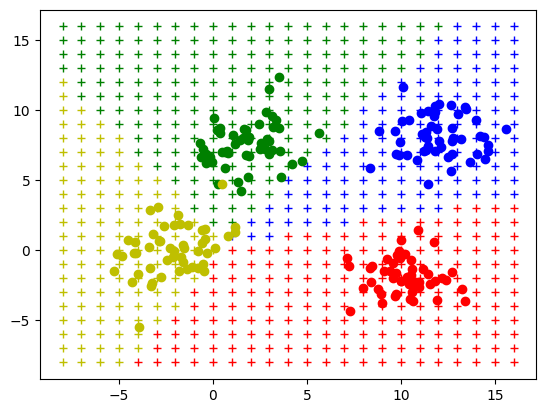

In [15]:
# Visualize the data and the trained model.
# Idea: Sample densely packed points within the range of the training data.
# Then, use the model to make predictions and display the results.

# `colors` are the markers used to visualize the test results.
colors = ['r+', 'g+', 'b+', 'y+']
# `gt_colors` are the markers used to visualize the training data.
gt_colors = ['ro', 'go', 'bo', 'yo']

# Sample densely packed points.
x = np.arange(-8, 17, 1)
y = np.arange(-8, 17, 1)
xx, yy = np.meshgrid(x,y)

xx = xx.reshape(-1)
yy = yy.reshape(-1)

# Generate densely packed test data.
X_test = np.concatenate([[xx],[yy]], axis=0).T
Y_pred = pretrain_sr.predict(X_test)

for i in range(len(xx)):
    plt.plot(xx[i],yy[i], colors[np.argmax(Y_pred[i])])
plt.plot(pts1[:,0], pts1[:,1], gt_colors[0])
plt.plot(pts2[:,0], pts2[:,1], gt_colors[1])
plt.plot(pts3[:,0], pts3[:,1], gt_colors[2])
plt.plot(pts4[:,0], pts4[:,1], gt_colors[3])
plt.show()

Therefore, we can observe that the 2D plane has been classified using the previously trained model with Softmax Regression. Based on the figure above, we can see that the results are quite accurate, except for some points at the boundaries between classes.